In [1]:
import distribution_test as dt
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mpl
import numpy as np
import pandas as pd

In [2]:
with open('../../postprocessing/representation.npy', 'rb') as f:
    rep = np.load(f)
    
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rep)
rep_scaled = scaler.transform(rep)
rep = rep_scaled

print(np.mean(rep, axis=1))
print(np.std(rep, axis=1))
    
df = pd.read_csv('../../dataset/m_test.csv')
print(df.columns.values)

[-0.1312   0.04068 -0.08057 ... -0.1119  -0.0376   0.04712]
[0.5957 0.739  0.4038 ... 0.4766 0.3733 0.7104]
['object_id' 'photoz' 'petroR90_r' 'r_cmodel_mag_ge' 'g_cmodel_mag_ge'
 'i_cmodel_mag_ge' 'z_cmodel_mag_ge' 'image_path' 'petro_half_light'
 'petro_90_light' 'dataset' 'snapshot_id' 'subhalo_id'
 'root_descendant_id' 'lookback' 'z' 'stellar_age_2rhalf_lumw'
 'fraction_disk_stars' 'stellar_mass' 'mass_in_rad' 'mass_exsitu'
 'half_mass_rad_physical' 'snap_num_last_maj_merger'
 'mass_last_maj_merger' 'mean_merger_lookback_time'
 'mean_merger_mass_ratio' 'color' 'i_band_mag_dust_apparent' 'mass'
 'lookback_time_last_maj_merger' 'exsitu']


In [3]:
indices_HSC = np.argwhere((df['dataset'] == 'HSC').to_numpy())[:,0]
indices_TNG100 = np.argwhere((df['dataset'] == 'HSC_TNG100').to_numpy())[:,0]

#first_rep = rep[0]
#first_df = df.iloc[0]

#print(first_rep)
#print(first_df)

np.random.shuffle(indices_HSC)
np.random.shuffle(indices_TNG100)

split_indices_HSC = np.array_split(indices_HSC, 2)
split_indices_TNG100 = np.array_split(indices_TNG100, 2)

x_list = [rep[split_indices_HSC[0]], rep[split_indices_HSC[1]], rep[split_indices_TNG100[0]], rep[split_indices_TNG100[1]]]
df_list = [df.iloc[split_indices_HSC[0]], df.iloc[split_indices_HSC[1]], df.iloc[split_indices_TNG100[0]], df.iloc[split_indices_TNG100[1]]]

x_list, df_list = dt.DistributionTest.reshape_inputs(x_list,df_list)
rep_HSC_0 = x_list[0]
rep_HSC_1 = x_list[1]
rep_TNG100_0 = x_list[2]
rep_TNG100_1 = x_list[3]
df_HSC_0 = df_list[0]
df_HSC_1 = df_list[1]
df_TNG100_0 = df_list[2]
df_TNG100_1 = df_list[3]

x_list = [rep_scaled[split_indices_HSC[0]], rep_scaled[split_indices_HSC[1]], rep_scaled[split_indices_TNG100[0]], rep_scaled[split_indices_TNG100[1]]]
df_list = [df.iloc[split_indices_HSC[0]], df.iloc[split_indices_HSC[1]], df.iloc[split_indices_TNG100[0]], df.iloc[split_indices_TNG100[1]]]

x_list, df_list = dt.DistributionTest.reshape_inputs(x_list,df_list)
rep_scaled_HSC_0 = x_list[0]
rep_scaled_HSC_1 = x_list[1]
rep_scaled_TNG100_0 = x_list[2]
rep_scaled_TNG100_1 = x_list[3]
df_HSC_0 = df_list[0]
df_HSC_1 = df_list[1]
df_TNG100_0 = df_list[2]
df_TNG100_1 = df_list[3]

#print(np.sum(df_HSC_1['object_id'] == 40168200599522096.0))
#print(rep_HSC_1[df_HSC_1['object_id'] == 40168200599522096.0])

assert rep_HSC_0.shape[0] == len(df_HSC_0)
assert rep_HSC_1.shape[0] == len(df_HSC_1)
assert rep_TNG100_0.shape[0] == len(df_TNG100_0)
assert rep_TNG100_1.shape[0] == len(df_TNG100_1)

In [7]:
mnnd_TNG = dt.MeanNormalizedNeighborDistance(rep_TNG100_0, n_neighbor=8, p=1)
score_TNG_HSC = mnnd_TNG.get_normalized_neighbor_distances(rep_HSC_0)
score_TNG_TNG = mnnd_TNG.get_normalized_neighbor_distances(rep_TNG100_1)

mnnd_HSC = dt.MeanNormalizedNeighborDistance(rep_HSC_0, n_neighbor=8, p=1)
score_HSC_HSC = mnnd_HSC.get_normalized_neighbor_distances(rep_HSC_1)
score_HSC_TNG = mnnd_HSC.get_normalized_neighbor_distances(rep_TNG100_0)

mnnd_scaled_TNG = dt.MeanNormalizedNeighborDistance(rep_scaled_TNG100_0, n_neighbor=8, p=1)
score_scaled_TNG_HSC = mnnd_scaled_TNG.get_normalized_neighbor_distances(rep_scaled_HSC_0)
score_scaled_TNG_TNG = mnnd_scaled_TNG.get_normalized_neighbor_distances(rep_scaled_TNG100_1)

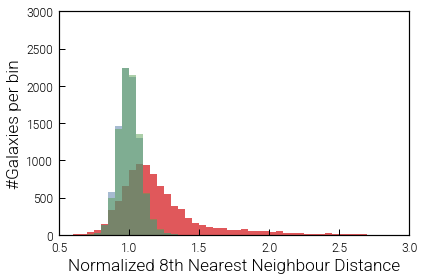

In [8]:
plt.hist(score_TNG_HSC, bins=50, range=[0.5,3.0])
plt.hist(score_TNG_TNG, bins=50, range=[0.5,3.0], alpha = 0.5)
plt.hist(score_HSC_HSC, bins=50, range=[0.5,3.0], alpha = 0.5)
plt.xlim(0.5,3.0)
plt.ylim(0, 3000)
plt.xlabel('Normalized 8th Nearest Neighbour Distance')
plt.ylabel('#Galaxies per bin')
plt.show()

max_HSC = np.max(score_TNG_HSC)
min_HSC = np.min(score_TNG_HSC)

mean_TNG = np.mean(score_TNG_TNG)
std_TNG = np.std(score_TNG_TNG)
lower_TNG = mean_TNG - std_TNG
upper_TNG = mean_TNG + std_TNG

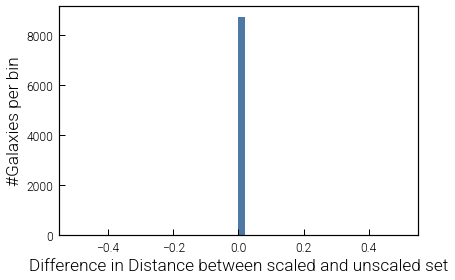

0.0
0.0


In [9]:
diff_HSC = (score_TNG_HSC - score_scaled_TNG_HSC)
diff_TNG = (score_TNG_TNG - score_scaled_TNG_TNG)
plt.hist(diff_HSC, bins=50)
plt.hist(diff_TNG, bins=50)
plt.xlabel('Difference in Distance between scaled and unscaled set')
plt.ylabel('#Galaxies per bin')
plt.show()

print(np.mean(diff_HSC))
print(np.std(diff_HSC))

[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8705   NaN
8706   NaN
8707   NaN
8708   NaN
8709   NaN
Name: object_id, Length: 8710, dtype: float64] contains non-finite values.
[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8705   NaN
8706   NaN
8707   NaN
8708   NaN
8709   NaN
Name: photoz, Length: 8710, dtype: float64] contains non-finite values.
[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8705   NaN
8706   NaN
8707   NaN
8708   NaN
8709   NaN
Name: petroR90_r, Length: 8710, dtype: float64] contains non-finite values.
[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8705   NaN
8706   NaN
8707   NaN
8708   NaN
8709   NaN
Name: r_cmodel_mag_ge, Length: 8710, dtype: float64] contains non-finite values.
[0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8705   NaN
8706   NaN
8707   NaN
8708   NaN
8709   NaN
Name: g_cmodel_mag_ge, Length: 8710, dtype: float64] contains non-finite values.
[0   

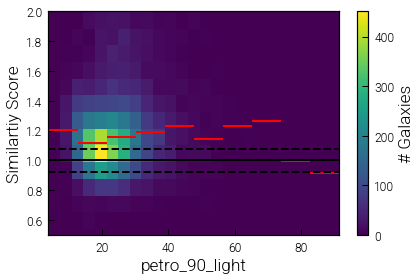

ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


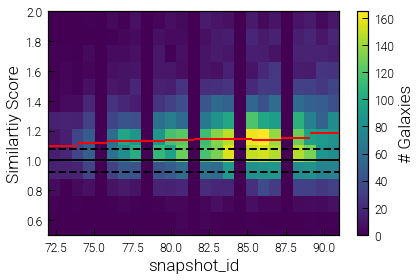

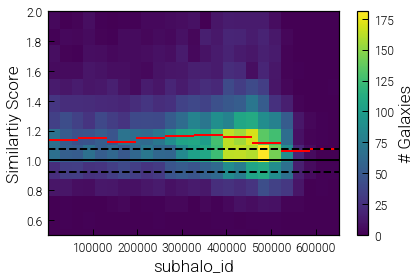

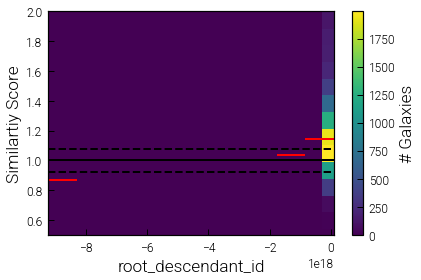

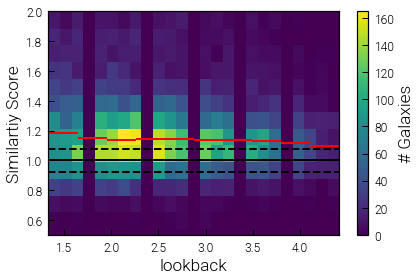

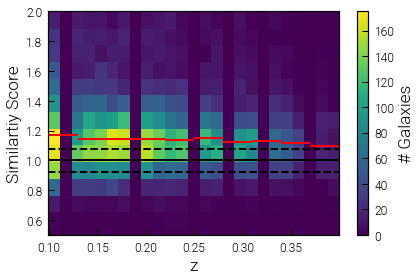

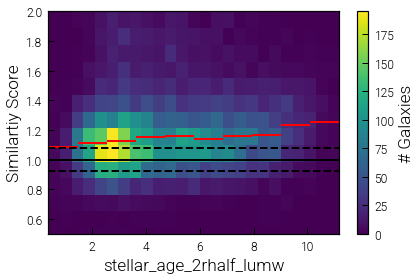

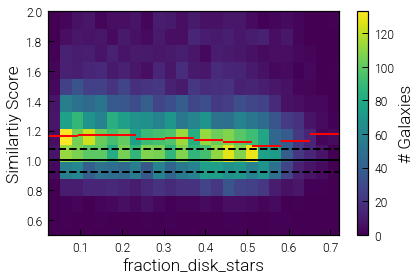

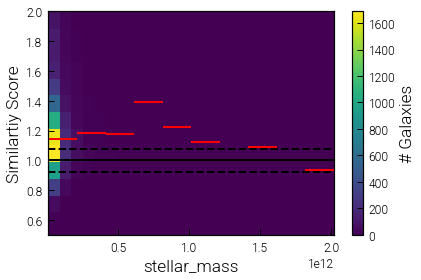

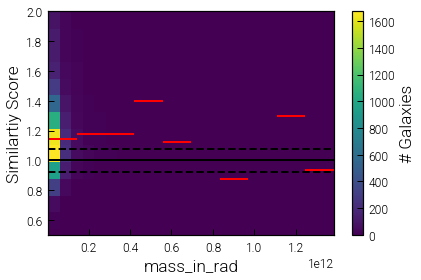

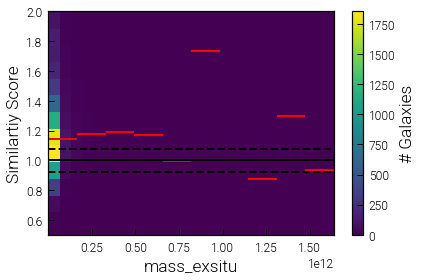

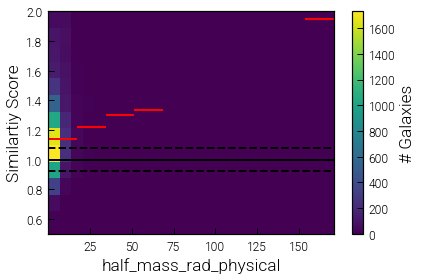

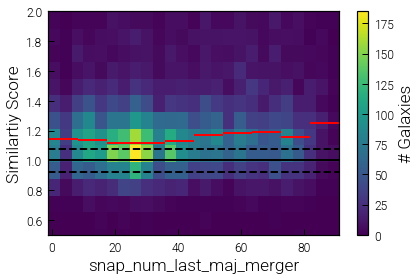

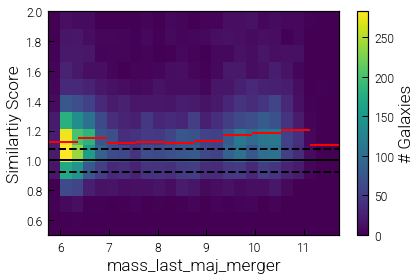

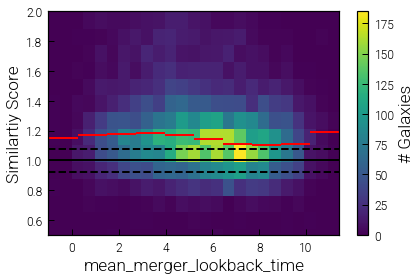

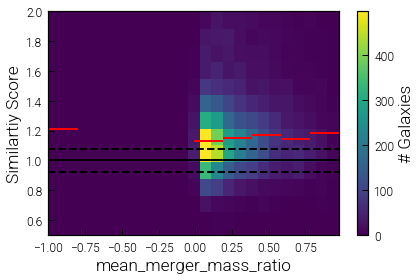

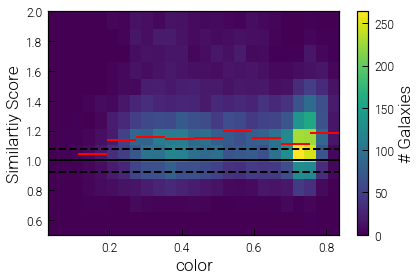

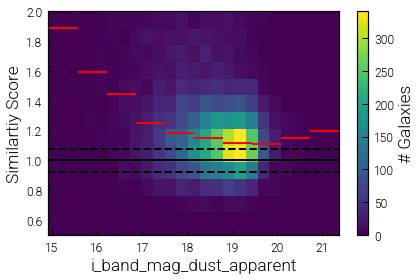

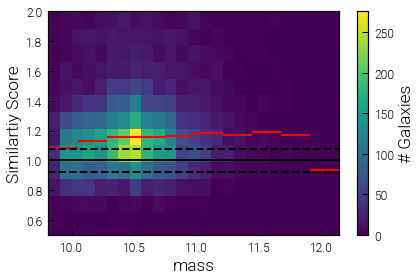

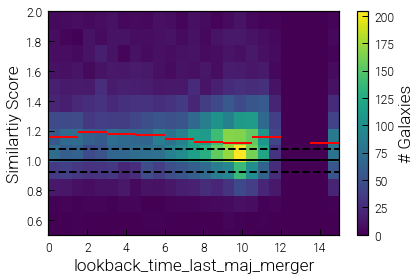

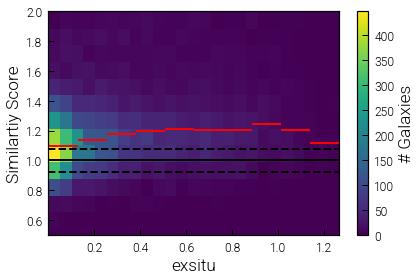

In [17]:
for label in df.columns.values:
    try:
        
        bin_statistic, bin_edges, binnumber = stats.binned_statistic(df_TNG100_0[label], score_TNG_HSC, statistic='median', bins=10)
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2
        
        plt.hist2d(df_TNG100_0[label], score_TNG_HSC, bins=25)
        plt.hlines(bin_statistic, bin_edges[:-1], bin_edges[1:], colors='r', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [mean_TNG, mean_TNG], 'k', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [lower_TNG, lower_TNG], 'k--', lw=2)
        plt.plot([bin_edges[0], bin_edges[-1]], [upper_TNG, upper_TNG], 'k--', lw=2)
        plt.colorbar(label='# Galaxies')
        plt.xlabel(label)
        plt.ylabel('Similartiy Score')
        plt.ylim(0.5, 2)
        plt.show()
        
    except Exception as e:
        print(e)

In [10]:
q = np.arange(0.0,1,0.25)
quantiles = np.quantile(measure_HSC, q)
classes = np.digitize(measure_HSC, quantiles)

In [12]:
import umap

#Set seed
SEED = 0

#Plot a single UMAP of x with color c
def create_umap(x, n_neighbors=50, min_dist=0.1, n_components=2, metric='euclidean'):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        densmap=False,
        random_state=SEED
    )
    model = fit.fit(x)
    
    return model

In [16]:
model = create_umap(rep, n_neighbors=100, min_dist=0.5)
u_TNG = model.transform(rep_TNG100_0)
u_HSC = model.transform(rep_HSC_0)

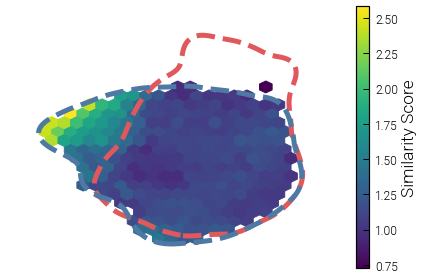

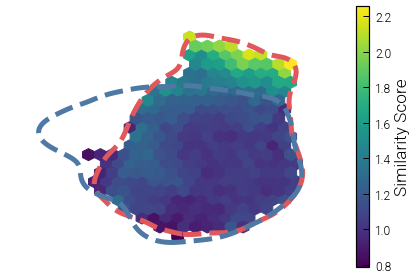

In [24]:
import seaborn as sns

plt.hexbin(u_TNG[:,0],u_TNG[:,1],
               C=score_TNG_HSC,
               gridsize=20,
               mincnt=5,
               reduce_C_function=np.median)
sns.kdeplot(x=u_HSC[:,0], y=u_HSC[:,1], levels=1, linewidths=5, linestyles='dashed')
sns.kdeplot(x=u_TNG[:,0], y=u_TNG[:,1], levels=1, linewidths=5, linestyles='dashed')
ax = plt.gca()
ax.axis('off')
plt.colorbar(label='Similarity Score')
plt.savefig('../../temp/umap_similarity_TNG.pdf')
plt.show()

plt.hexbin(u_HSC[:,0],u_HSC[:,1],
               C=score_HSC_TNG,
               gridsize=20,
               mincnt=5,
               reduce_C_function=np.median)
sns.kdeplot(x=u_HSC[:,0], y=u_HSC[:,1], levels=1, linewidths=5, linestyles='dashed')
sns.kdeplot(x=u_TNG[:,0], y=u_TNG[:,1], levels=1, linewidths=5, linestyles='dashed')
ax = plt.gca()
ax.axis('off')
plt.colorbar(label='Similarity Score')
plt.savefig('../../temp/umap_similarity_HSC.pdf')
plt.show()

In [31]:
mndd = dt.MeanNormalizedNeighborDistance(rep_TNG100_0, n_neighbor=8, p=1)
measure = mndd.get_normalized_neighbor_distances(rep_HSC_0)

from scipy.spatial import cKDTree
tree = cKDTree(rep_HSC_0, compact_nodes=False, balanced_tree=False)
distance, indexes = tree.query(rep_TNG100_0, k=[1], p=1)
indexes = indexes[:,0]

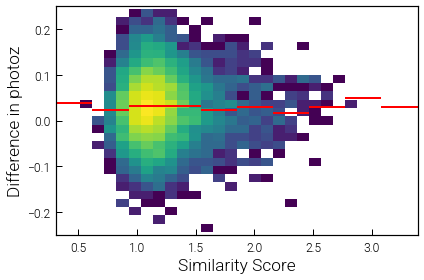

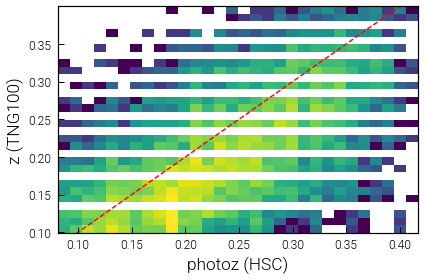

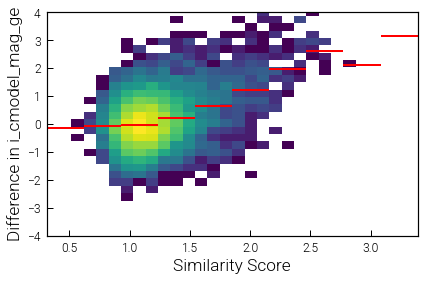

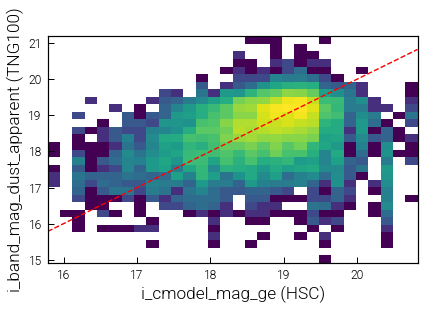

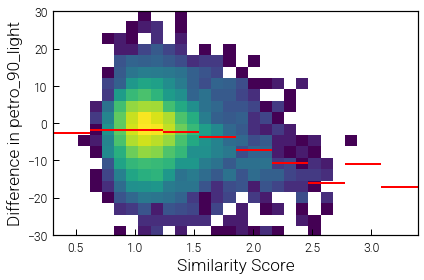

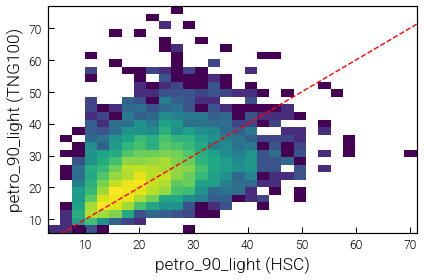

In [34]:
HSC_labels = ['photoz', 'i_cmodel_mag_ge', 'petro_90_light'] 
TNG_labels = ['z', 'i_band_mag_dust_apparent', 'petro_90_light']
limits = [0.25, 4, 30]

for hl, tl, lim in zip(HSC_labels, TNG_labels, limits):

    diff = df_HSC_0.iloc[indexes][hl].to_numpy() - df_TNG100_0[tl].to_numpy()
    plt.hist2d(measure, diff, norm=mpl.colors.LogNorm(), bins=30, cmin=2)
    #plt.scatter(measure, diff, s = 2)
    
    bin_statistic, bin_edges, binnumber = stats.binned_statistic(measure, diff, statistic='mean', bins=10)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
        
    plt.hlines(bin_statistic, bin_edges[:-1], bin_edges[1:], colors='r', lw=2)
    plt.xlabel('Similarity Score')
    plt.ylabel('Difference in ' + hl)
    plt.ylim(-lim, lim)
    
    plt.show()

    plt.hist2d(df_HSC_0.iloc[indexes][hl].to_numpy(), df_TNG100_0[tl].to_numpy(), norm=mpl.colors.LogNorm(), bins=30)
    min_h = np.min(df_HSC_0.iloc[indexes][hl].to_numpy())
    max_h = np.max(df_HSC_0.iloc[indexes][hl].to_numpy())
    plt.plot([min_h, max_h],[min_h, max_h], 'r--')
    plt.xlabel(hl + ' (HSC)')
    plt.ylabel(tl + ' (TNG100)')
    plt.show()